In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

f = ['frequency_score','product_variation_score','X1']

In [3]:
# Выбираем данные 3-и параметра, исходя из результатов Р-статистики, которые были проведены в предыдущей работе.
# То есть, эти параметры являются наиболее значимыми в построении модели.

In [4]:
from math import sqrt
def metrics(X_train, X_test, y_train, y_test, y_pred, model):
    RMSE = [sqrt(mean_squared_error(y_train, model.predict(X_train))), sqrt(mean_squared_error(y_test, y_pred))]
    R2 = [model.score(X_train, y_train), model.score(X_test, y_test)]
    results = {'RMSE': RMSE, 'R2':R2}
    return pd.DataFrame(results, index=['Train', 'Test'])

In [5]:
# Regression Tree

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

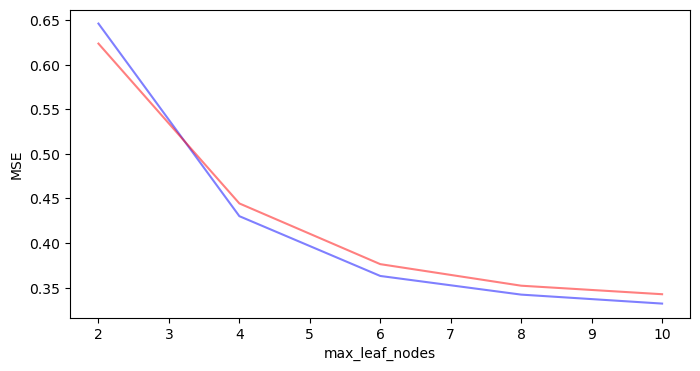

In [6]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        dt = DecisionTreeRegressor(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, dt.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, dt.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")
    
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train[f], X_test[f], y_train, y_test, [2, 4, 6, 8, 10])
plt.show()

In [7]:
# Благодаря методу локтя будем определять по графику самое оптимальное количество ветвей для построение дерева решений.
# Основные заломления графика наблюдаются на уровне 4-х и 6-и ветвей. После 6-и ветвей средний квадрат ошибки уже
# уменьшается с меньшей скоростью, так как спуск по графику становится более плавным. Поэтому можем предположить,
# что 6 ветвей для нашего дерева будут оптимальным набором. 

In [8]:
dt = DecisionTreeRegressor(max_leaf_nodes = 6).fit(X_train[f], y_train)

dt_y_pred = dt.predict(X_test[f])

metrics(X_train[f], X_test[f], y_train, y_test, dt_y_pred, dt).round(2)

,RMSE,R2
Train,0.60,0.66
Test,0.61,0.62


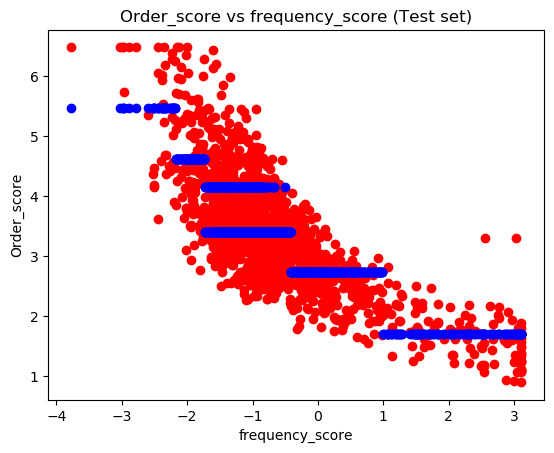

In [9]:
plt.scatter(X_test['frequency_score'], y_test, color = 'red')
plt.plot(X_test['frequency_score'], dt.predict(X_test[f]), 'bo')
plt.title('Order_score vs frequency_score (Test set)')
plt.xlabel('frequency_score')
plt.ylabel('Order_score')
plt.show()

In [10]:
dt = DecisionTreeRegressor(max_leaf_nodes = 8).fit(X_train[f], y_train)

dt_y_pred = dt.predict(X_test[f])

metrics(X_train[f], X_test[f], y_train, y_test, dt_y_pred, dt).round(2)

,RMSE,R2
Train,0.58,0.68
Test,0.59,0.65


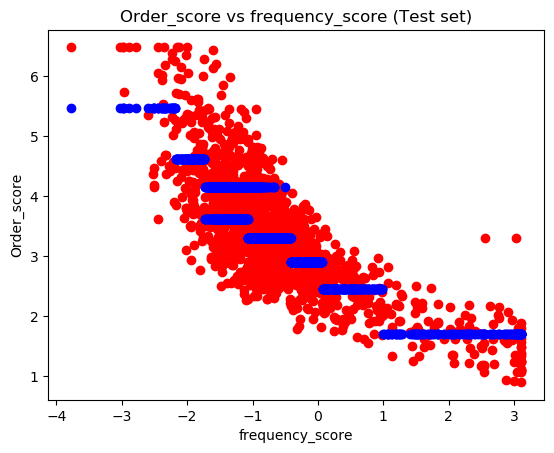

In [11]:
plt.scatter(X_test['frequency_score'], y_test, color = 'red')
plt.plot(X_test['frequency_score'], dt.predict(X_test[f]), 'bo')
plt.title('Order_score vs frequency_score (Test set)')
plt.xlabel('frequency_score')
plt.ylabel('Order_score')
plt.show()

In [12]:
dt = DecisionTreeRegressor(max_leaf_nodes = 10).fit(X_train[f], y_train)

dt_y_pred = dt.predict(X_test[f])

metrics(X_train[f], X_test[f], y_train, y_test, dt_y_pred, dt).round(2)

,RMSE,R2
Train,0.58,0.69
Test,0.59,0.66


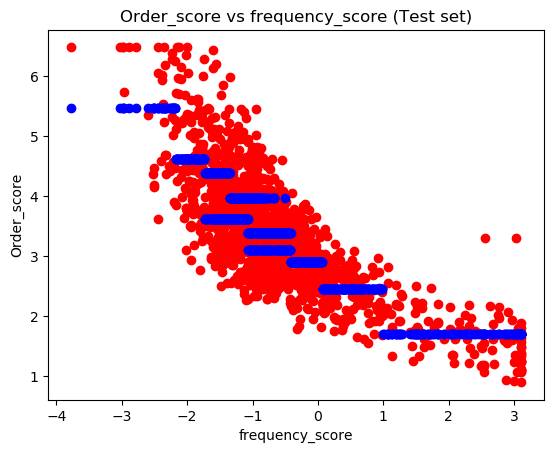

In [13]:
plt.scatter(X_test['frequency_score'], y_test, color = 'red')
plt.plot(X_test['frequency_score'], dt.predict(X_test[f]), 'bo')
plt.title('Order_score vs frequency_score (Test set)')
plt.xlabel('frequency_score')
plt.ylabel('Order_score')
plt.show()

In [14]:
# Итак, путем проведения нескольких серий повтором с построением дерева решений, приходим к выводу, что наилучшие  
# результаты получаются при использовании 8-и ветвей (2-й график). Среднеквадратическая ошибка при 8-и узлах 
# меньше по сравнению с 6-ю, а также улучшается уровень объяснённости. 
# 10-ть веток тоже дают несколько улучшенный результат R2, но ошибка остается прежней, из-за этого нет смысла 
# усложнять модель дополнительными ветвями. 

In [15]:
dt = DecisionTreeRegressor(max_leaf_nodes = 8).fit(X_train[f], y_train)
dt_y_pred = dt.predict(X_test[f])
metrics(X_train[f], X_test[f], y_train, y_test, dt_y_pred, dt).round(2)

,RMSE,R2
Train,0.58,0.68
Test,0.59,0.65


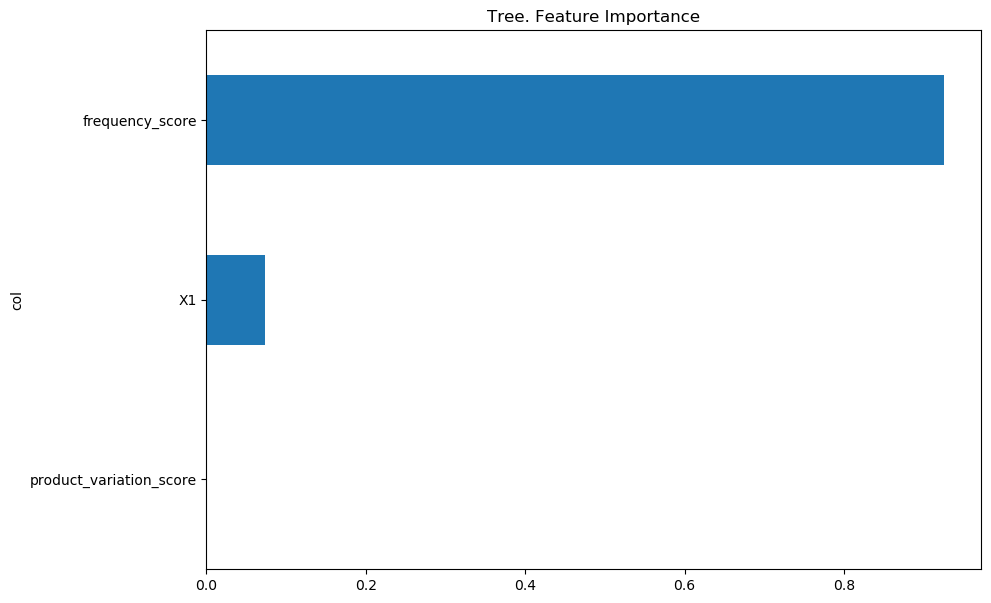

In [16]:
dt_imp = pd.DataFrame({'imp': dt.feature_importances_, 'col': X_train[f].columns})
dt_imp = dt_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-10:]
dt_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Tree. Feature Importance')
plt.show()

In [17]:
# При построении дерева решений основным критерием является frequency_score, как это видно на гистограмме. Также небольшое влияние 
# на отбор элементов демонстрирует Х1, а последняя переменная не принимает участия в роли критериев. 

In [18]:
# Random Forest

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boost

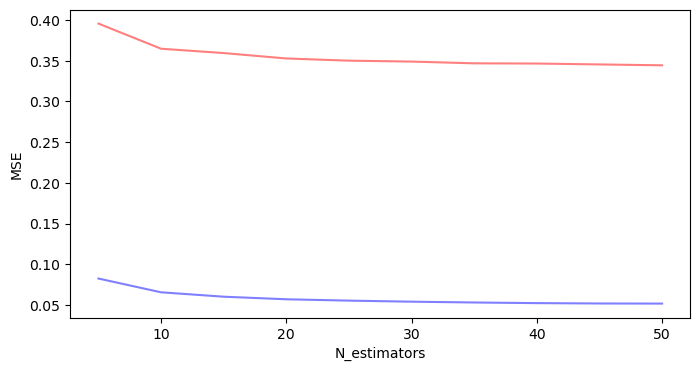

In [19]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")
    
from sklearn.ensemble import RandomForestRegressor    
rf_best_n_estimator(X_train[f], X_test[f], y_train, y_test, [5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.show()

In [20]:
# Самое весомое изменение среднего квадрата ошибки наблюдается при 10-и деревьев. Далее MSE находится почти на одном уровне.
# Поэтому весомого смысла усложнять модель дополнительным количеством деревьев нет, так как результаты изменения модели при 
# большем их количестве будут незначительные.

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

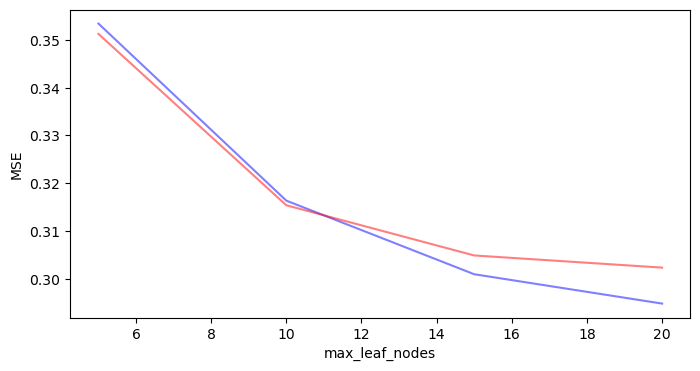

In [21]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=10, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")
    
rf_max_leaf_nodes(X_train[f], X_test[f], y_train, y_test, [5, 10, 15, 20])
plt.show()

In [22]:
# Примерно 11-ть веток дают одинаковый уровень ошибки на тестовой и обучающей выборке. Таким образом можно сказать, 
# что именно это количество наилучшим образом будет описывать модель.

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, max_leaf_nodes = 11, random_state = 10).fit(X_train[f], y_train)

rf_y_pred = rf.predict(X_test[f])

metrics(X_train[f], X_test[f], y_train, y_test, rf_y_pred, rf).round(2)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

,RMSE,R2
Train,0.56,0.71
Test,0.56,0.69


In [24]:
# При использовании случайного леса качество модели значительно улучшилось по сравнению с деревом решений. Повысились показатели 
# объясненности обеих выборок, а уровень ошибки стал меньше. То есть, данный метод лучше описывает нашу модель.

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


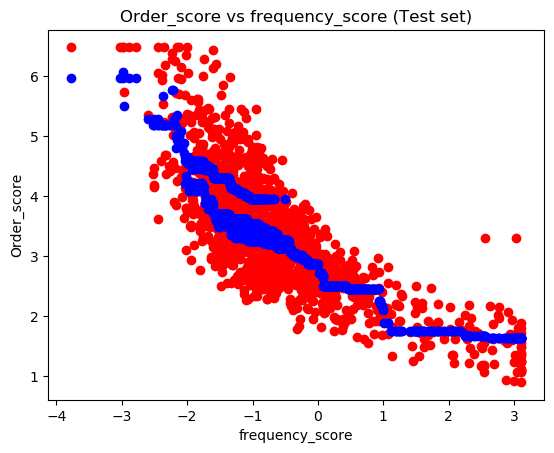

In [25]:
plt.scatter(X_test['frequency_score'], y_test, color = 'red')
plt.plot(X_test['frequency_score'], rf.predict(X_test[f]), 'bo')
plt.title('Order_score vs frequency_score (Test set)')
plt.xlabel('frequency_score')
plt.ylabel('Order_score')
plt.show()

In [26]:
# На данном графике прогнозные знаения расположены более четко по отношению к реальным.

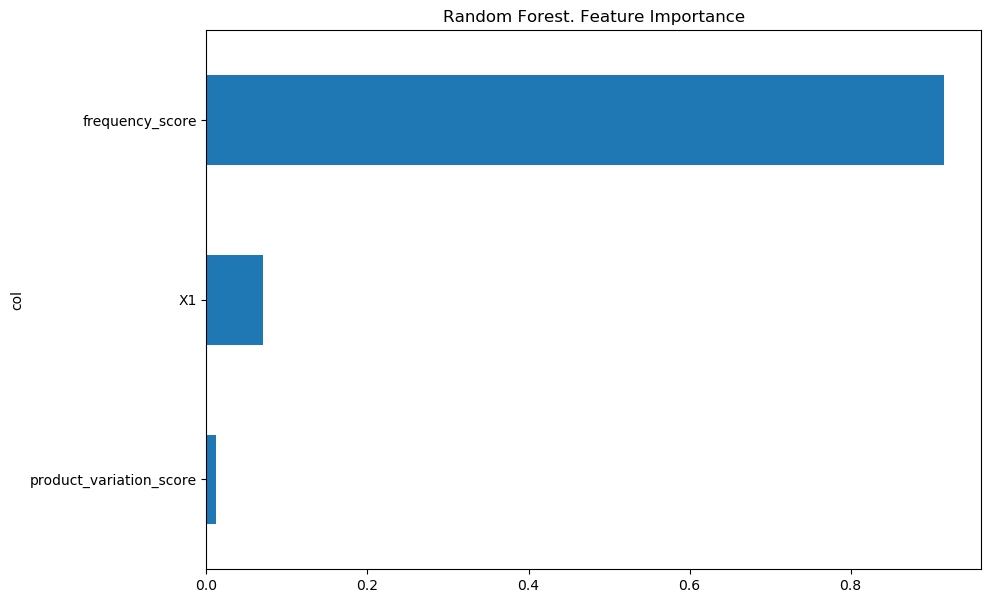

In [27]:
rf_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X_train[f].columns})
rf_imp = rf_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-20:]
rf_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Random Forest. Feature Importance')
plt.show()

In [28]:
# Случайный лес для отбора и сортировки данных уже использует все три критерия, но в большей мере все также преобладает переменная frequency_score.

In [29]:
# CatBoost

In [30]:
# ! pip install catboost

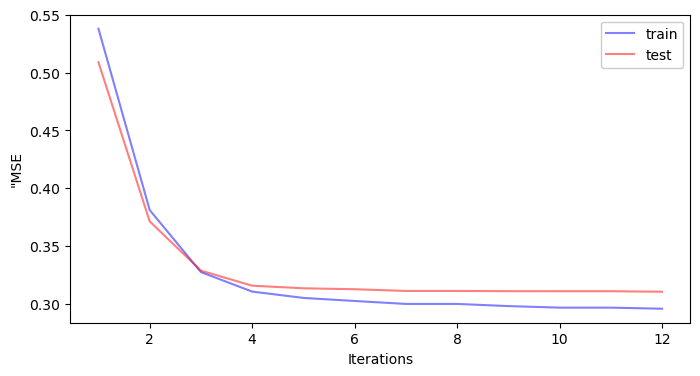

In [31]:
def catboost_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostRegressor(iterations=i,random_state=10,eval_metric='RMSE',loss_function='RMSE').fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel('"MSE')
    ax.set_xlabel('Iterations')
    ax.legend(framealpha=1, frameon=True);
    
from catboost import CatBoostRegressor
catboost_best_n_estimator(X_train[f], X_test[f], y_train, y_test, list(range(1,13)))
plt.show()

In [32]:
# На уровне 3-х итераций MSE обучающей и тестовой выборок являются равными. После 4-х выдим более ровное схождение графика.
# Было проведно несколько экспериментов, которые показали, что прои 3-х итерациях дальнейшие резултаты являются самыми лучшими.
# Именно поэтому я остановилась на количестве итераций 3.

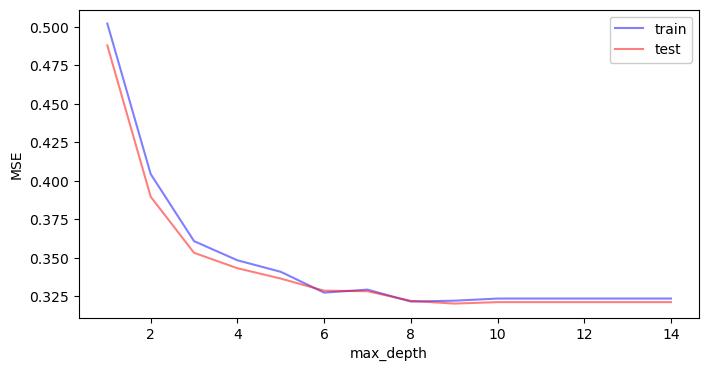

In [33]:
def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostRegressor(iterations=3,max_depth=i,random_state=10,eval_metric='RMSE',loss_function='RMSE').fit(X_train,y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

catboost_max_depth(X_train[f], X_test[f], y_train, y_test, list(range(1,15)))
plt.show()

In [34]:
# Как видно по графику, MSE обучающей выборки немного больше тестовой. После значения глубины 6 эти ошибки становятся почти одинаковыми.
# Поэтому для дальнейшего простроения модели будем брать максимальную глубину 6.

In [35]:
cb = CatBoostRegressor(iterations=3,max_depth=6,random_state=10,eval_metric='RMSE',loss_function='RMSE').fit(X_train[f], y_train,eval_set=(X_test[f], y_test),logging_level='Silent')

cb_y_pred = cb.predict(X_test[f])

metrics(X_train[f], X_test[f], y_train, y_test, cb_y_pred, cb).round(2)

,RMSE,R2
Train,0.57,0.69
Test,0.57,0.67


In [36]:
# При использовании случайного леса результаты модели были немного лучше.

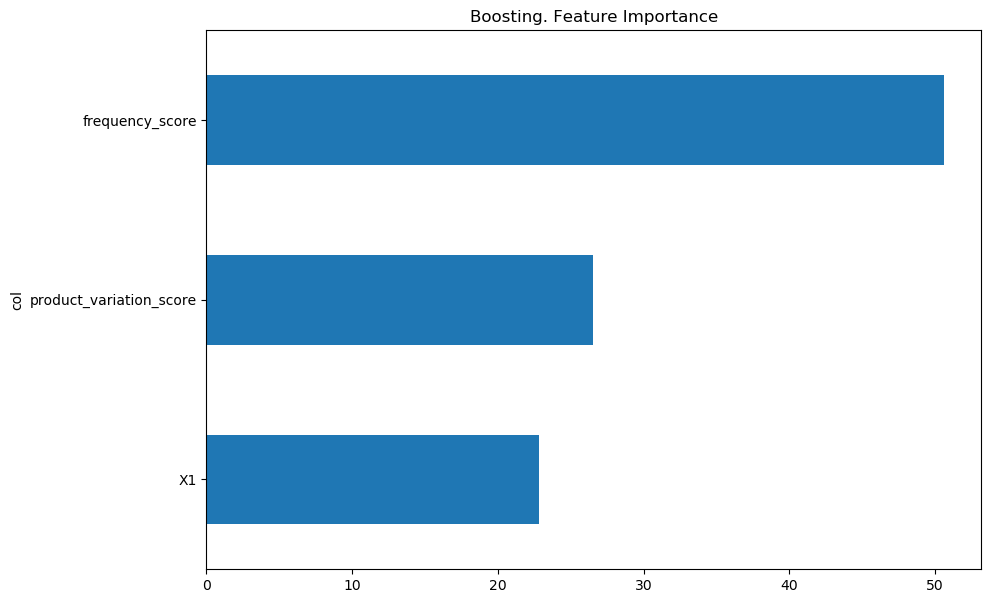

In [37]:
cb_imp = pd.DataFrame({'imp': cb.get_feature_importance(), 'col': X_train[f].columns})
cb_imp = cb_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
cb_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')
plt.show()

In [38]:
# В этой модели также участвуют все три параметра. Но в случайном лесе Х1 занимал вторую позицию по значимости параметра, а в данной модели - последнее место.

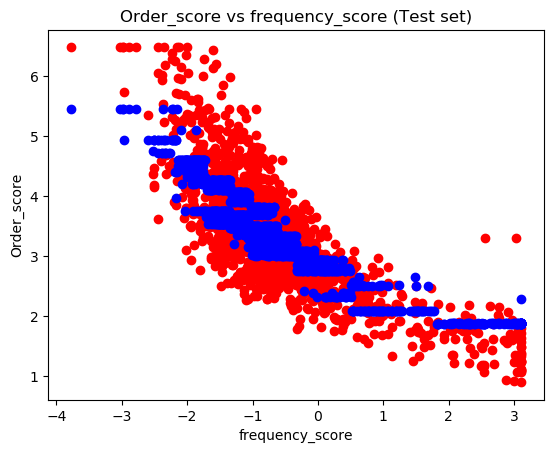

In [39]:
plt.scatter(X_test['frequency_score'], y_test, color = 'red')
plt.plot(X_test['frequency_score'], cb.predict(X_test[f]), 'bo')
plt.title('Order_score vs frequency_score (Test set)')
plt.xlabel('frequency_score')
plt.ylabel('Order_score')
plt.show()

In [40]:
# В целом график прогнозных значений хорошо повторяет реальные значения.

In [41]:
metric_dt = metrics(X_train[f], X_test[f], y_train,y_test, dt_y_pred, dt).round(2).abs()
metric_dt['Type'] = 'Tree'

metric_rf = metrics(X_train[f], X_test[f], y_train,y_test,  rf_y_pred, rf).round(2).abs()
metric_rf['Type'] = 'Random forest'

metric_cb = metrics(X_train[f], X_test[f], y_train,y_test, cb_y_pred, cb).round(2)
metric_cb['Type'] = 'Catboost'

metric = pd.concat([metric_dt,metric_rf,metric_cb])
metric

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

,RMSE,R2,Type
Train,0.58,0.68,Tree
Test,0.59,0.65,Tree
Train,0.56,0.71,Random forest
Test,0.56,0.69,Random forest
Train,0.57,0.69,Catboost
Test,0.57,0.67,Catboost


In [42]:
# Итак, случайный лес имеет наилучшие показатели модели. В разделе линейной регрессии самые хорошие результаты показала полиномильная модель.
# Если сравнить её показатели со случайным лесом, то имеем следующие результаты: среднеквадратические ошибки примерно одинаковые, R2 у 
# случайного леса немного лучше. Получается, наилучший метод построения модели для имеющихся данных - случайный лес.